# - CE4_DCS1302_CatVsDog Classification

# - Cat Vs Dog image classification

- Dataset used: https://www.tensorflow.org/datasets/catalog/cats_vs_dogs 


## Importing the necessary libraries

In [392]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join

In [393]:
train_data_dir = 'C:/Users/G Navyadharagana Sai/Desktop/AIML_Intern/DogCat/image_data/training'
validation_data_dir = 'C:/Users/G Navyadharagana Sai/Desktop/AIML_Intern/DogCat/image_data/validation'

train_samples = 2000
validation_samples = 800
batch_size = 16
epochs = 50
img_height = 150
img_width = 150

### Implementing CNN mdoel using keras

In [426]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape=(150, 150,3)))
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(32, (3, 3)))
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(64, (3, 3)))
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
classifier.add(Dense(64))
classifier.add(Activation('relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(1))
classifier.add(Activation('sigmoid'))
classifier.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_100 (Activation)  (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_101 (Activation)  (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 34, 34, 64)      

In [404]:
import keras
from keras import optimizers
classifier.compile(loss='binary_crossentropy', 
              optimizer=keras.optimizers.Adam(lr=.0001),
              metrics=['accuracy'])

In [405]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [406]:
# this is the augmentation configuration we will use for testing:
# only rescaling, avoiding having same training and validation data.
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [407]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [408]:
print(train_generator.class_indices)
#Checking the number of classes

{'Cat': 0, 'Dog': 1}


In [409]:
imgs, labels = next(train_generator)

In [410]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()
from PIL import Image
print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
#     plt.imshow(image)

16
0.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0


In [411]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 800 images belonging to 2 classes.


## Training

In [417]:
#In fit_generator(), you don't pass the x and y directly, instead they come from a generator.
history = classifier.fit_generator(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)

Epoch 1/50
125/125 [==============================] - 44s 355ms/step - loss: 0.5947 - accuracy: 0.6910 - val_loss: 0.4387 - val_accuracy: 0.6825
Epoch 2/50
125/125 [==============================] - 40s 323ms/step - loss: 0.5716 - accuracy: 0.7130 - val_loss: 0.5519 - val_accuracy: 0.6687
Epoch 3/50
125/125 [==============================] - 41s 326ms/step - loss: 0.5667 - accuracy: 0.7030 - val_loss: 0.5556 - val_accuracy: 0.7075
Epoch 4/50
125/125 [==============================] - 41s 327ms/step - loss: 0.5542 - accuracy: 0.7275 - val_loss: 0.6576 - val_accuracy: 0.7225
Epoch 5/50
125/125 [==============================] - 41s 332ms/step - loss: 0.5429 - accuracy: 0.7315 - val_loss: 0.3534 - val_accuracy: 0.7063
Epoch 6/50
125/125 [==============================] - 41s 328ms/step - loss: 0.5285 - accuracy: 0.7325 - val_loss: 0.5960 - val_accuracy: 0.7225
Epoch 7/50
125/125 [==============================] - 44s 349ms/step - loss: 0.5213 - accuracy: 0.7455 - val_loss: 0.6189 - val_ac

## Plotting Loss and Accuracy

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


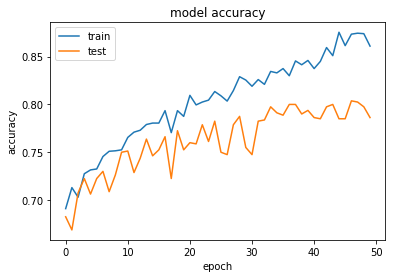

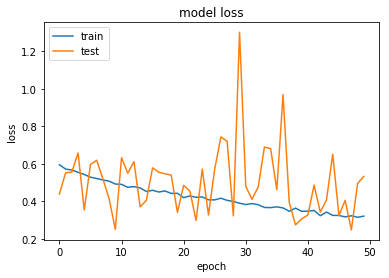

we can observe a accuracy of about 89-90%


In [427]:

import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print("we can observe a accuracy of about 89-90%")

## Testing the model with 5 images of each class

In [419]:
predict_dir_path='image_data/test/'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['19.jpg', '234.jpg', '236.jpg', '2512.jpg', '2658.jpg', '2994.jpg', '310.jpg', '3111.jpg', '3285.jpg', '4.jpg']


In [420]:
from keras.preprocessing import image
dog_counter = 0 
cat_counter  = 0
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = classifier.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + "-->" + 'cat')
        cat_counter += 1
    else:
        print(file + "-->"  + 'dog')
        dog_counter += 1
print("Total Dogs :",dog_counter)
print("Total Cats :",cat_counter)

19.jpg-->cat
234.jpg-->cat
236.jpg-->dog
2512.jpg-->dog
2658.jpg-->cat
2994.jpg-->dog
310.jpg-->dog
3111.jpg-->cat
3285.jpg-->dog
4.jpg-->dog
Total Dogs : 6
Total Cats : 4


### Saving the model

In [421]:
import os
from keras.models import model_from_json

clssf = classifier.to_json()
with open("CatOrDog.json", "w") as json_file:
    json_file.write(clssf)
classifier.save_weights("CorDweights.h5")
print("model saved to disk....")

model saved to disk....


### Loading the model and perfoming tests

In [349]:
json_file = open('CatOrDog.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("CorDweights.h5")
print("The model has been done loaded")

The model has been done loaded


In [423]:
predict_dir_path='image_data/model_test/'
tf = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(tf)

['car2.jpg', 'cat.jpg', 'cat3.jpg', 'cat4.jpg', 'cat5.jpg', 'dog.jpg', 'dog2.jpg', 'dog4.jpg', 'dog5.jpg']


In [425]:
from keras.preprocessing import image
dog_counter = 0 
cat_counter  = 0
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = classifier.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + "-->" + 'cat')
        cat_counter += 1
    else:
        print(file + "-->"  + 'dog')
        dog_counter += 1
print("Total Dogs :",dog_counter)
print("Total Cats :",cat_counter)

car2.jpg-->cat
cat.jpg-->cat
cat3.jpg-->dog
cat4.jpg-->cat
cat5.jpg-->cat
dog.jpg-->dog
dog2.jpg-->dog
dog4.jpg-->dog
dog5.jpg-->dog
Total Dogs : 5
Total Cats : 4
